In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

In [2]:
train = pd.read_csv('train.csv')

In [3]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
PassengerId    891 non-null int64
Survived       891 non-null int64
Pclass         891 non-null int64
Name           891 non-null object
Sex            891 non-null object
Age            714 non-null float64
SibSp          891 non-null int64
Parch          891 non-null int64
Ticket         891 non-null object
Fare           891 non-null float64
Cabin          204 non-null object
Embarked       889 non-null object
dtypes: float64(2), int64(5), object(5)
memory usage: 83.6+ KB


In [4]:
train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [5]:
train['Survived'].value_counts()

0    549
1    342
Name: Survived, dtype: int64

In [6]:
train['Sex'].value_counts()

male      577
female    314
Name: Sex, dtype: int64

In [7]:
train['Pclass'].value_counts()

3    491
1    216
2    184
Name: Pclass, dtype: int64

In [8]:
train['Embarked'].value_counts()

S    644
C    168
Q     77
Name: Embarked, dtype: int64

In [9]:
train['SibSp'].value_counts()

0    608
1    209
2     28
4     18
3     16
8      7
5      5
Name: SibSp, dtype: int64

In [10]:
train['Parch'].value_counts()

0    678
1    118
2     80
5      5
3      5
4      4
6      1
Name: Parch, dtype: int64

In [11]:
train.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


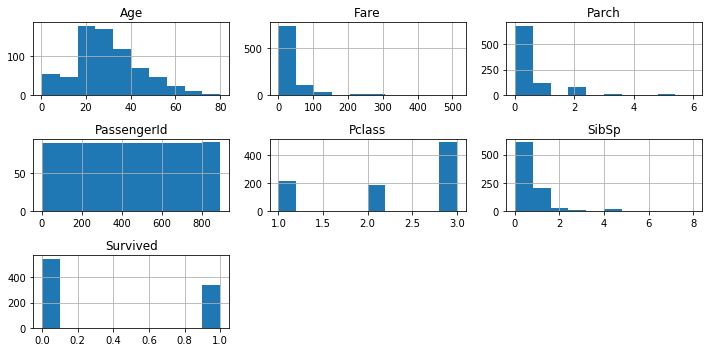

In [12]:
train.hist(figsize=(10,5))
plt.tight_layout()
plt.show()

In [13]:
train.groupby('Sex')['Age'].median()

Sex
female    27.0
male      29.0
Name: Age, dtype: float64

In [14]:
pd.isnull(train.loc[17,'Age'])

True

In [15]:
def age_fix(row):
    if pd.isnull(row['Age']) == False:
        return row['Age']
    if (row['Sex'] == 'male') and (pd.isnull(row['Age'])):
        return 29
    if (row['Sex'] == 'female') and (pd.isnull(row['Age'])):
        return 27

In [16]:
train['Age'] = train.apply(age_fix, 1)

In [17]:
train.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.441268,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,13.018747,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,22.000000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,29.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,35.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [18]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
PassengerId    891 non-null int64
Survived       891 non-null int64
Pclass         891 non-null int64
Name           891 non-null object
Sex            891 non-null object
Age            891 non-null float64
SibSp          891 non-null int64
Parch          891 non-null int64
Ticket         891 non-null object
Fare           891 non-null float64
Cabin          204 non-null object
Embarked       889 non-null object
dtypes: float64(2), int64(5), object(5)
memory usage: 83.6+ KB


In [19]:
train['Embarked'] = train['Embarked'].fillna('S')

In [20]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
PassengerId    891 non-null int64
Survived       891 non-null int64
Pclass         891 non-null int64
Name           891 non-null object
Sex            891 non-null object
Age            891 non-null float64
SibSp          891 non-null int64
Parch          891 non-null int64
Ticket         891 non-null object
Fare           891 non-null float64
Cabin          204 non-null object
Embarked       891 non-null object
dtypes: float64(2), int64(5), object(5)
memory usage: 83.6+ KB


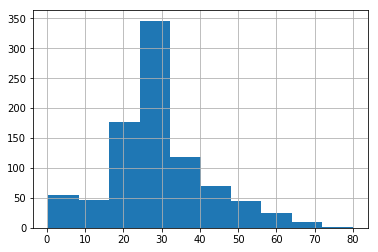

In [21]:
train['Age'].hist()

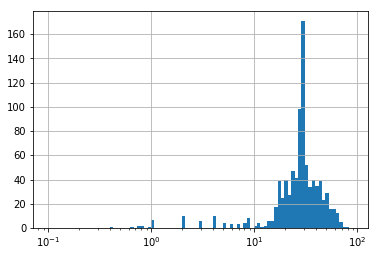

In [22]:
train['Age'].hist(bins=np.logspace(np.log10(0.1),np.log10(90), 90))
plt.xscale('log')
plt.show()

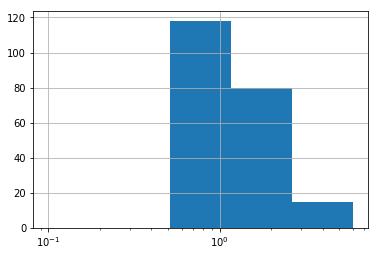

In [23]:
train['Parch'].hist(bins=np.logspace(np.log10(0.1),np.log10(6), 6))
plt.xscale('log')

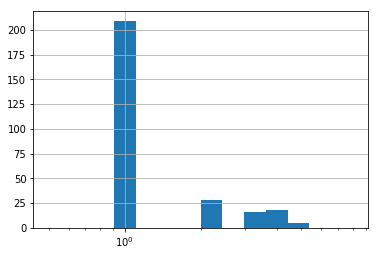

In [24]:
train['SibSp'].hist(bins=np.logspace(np.log10(0.5),np.log10(8), 15))
plt.xscale('log')

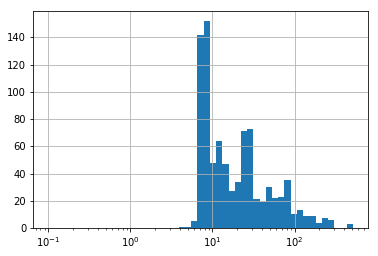

In [25]:
train['Fare'].hist(bins=np.logspace(np.log10(0.1),np.log10(513), 50))
plt.xscale('log')
plt.show()

In [26]:
train['total_fam'] = train['Parch'] + train['SibSp'] + 1

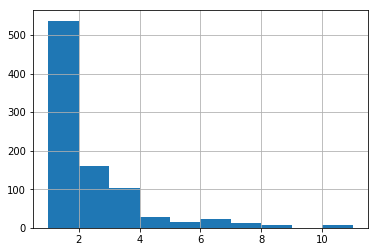

In [27]:
train['total_fam'].hist()

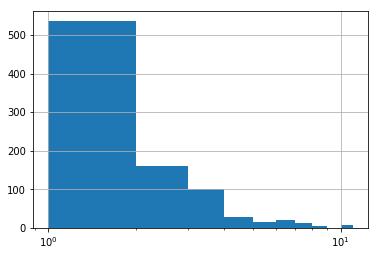

In [28]:
train['total_fam'].hist()
plt.xscale('log')

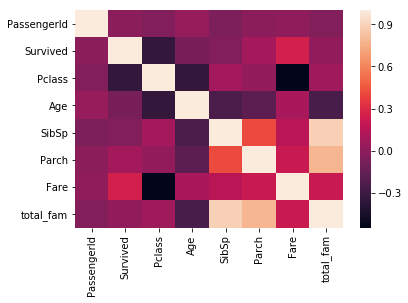

In [29]:
sns.heatmap(train.corr())

In [30]:
str(train['Name'].str.split(', ')[1][1]).split(' ')[0]

'Mrs.'

In [31]:
def prefix(row):
    return str(row['Name'].split(', ')[1]).split(' ')[0]

In [38]:
train['prefix'] = train.apply(prefix, 1)

In [39]:
train['prefix'].value_counts()

Mr.          517
Miss.        182
Mrs.         125
Master.       40
Dr.            7
Rev.           6
Major.         2
Mlle.          2
Col.           2
Mme.           1
Jonkheer.      1
Capt.          1
Don.           1
the            1
Ms.            1
Lady.          1
Sir.           1
Name: prefix, dtype: int64

In [40]:
train['prefix'].replace(['Mlle.','Mme.','Ms.','Major.','Lady.','Countess.','Jonkheer.','Col.','Rev.','Capt.','Sir.','Don.','the'],['Miss.','Miss.','Miss.','Mr.','Mrs.','Mrs.','Other','Other','Other','Mr.','Mr.','Mr.','Mrs.'],inplace=True)

In [41]:
train['prefix'].value_counts()

Mr.        522
Miss.      186
Mrs.       127
Master.     40
Other        9
Dr.          7
Name: prefix, dtype: int64

In [42]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 14 columns):
PassengerId    891 non-null int64
Survived       891 non-null int64
Pclass         891 non-null int64
Name           891 non-null object
Sex            891 non-null object
Age            891 non-null float64
SibSp          891 non-null int64
Parch          891 non-null int64
Ticket         891 non-null object
Fare           891 non-null float64
Cabin          204 non-null object
Embarked       891 non-null object
total_fam      891 non-null int64
prefix         891 non-null object
dtypes: float64(2), int64(6), object(6)
memory usage: 97.5+ KB


In [43]:
train[['Ticket','SibSp','Parch']]

,Ticket,SibSp,Parch
0,A/5 21171,1,0
1,PC 17599,1,0
2,STON/O2. 3101282,0,0
3,113803,1,0
4,373450,0,0
5,330877,0,0
6,17463,0,0
7,349909,3,1
8,347742,0,2
9,237736,1,0


In [44]:
train.Ticket.value_counts()

CA. 2343             7
347082               7
1601                 7
CA 2144              6
347088               6
3101295              6
S.O.C. 14879         5
382652               5
19950                4
LINE                 4
2666                 4
347077               4
113781               4
PC 17757             4
W./C. 6608           4
4133                 4
113760               4
349909               4
17421                4
239853               3
C.A. 31921           3
363291               3
F.C.C. 13529         3
371110               3
PC 17755             3
347742               3
110152               3
PC 17582             3
110413               3
13502                3
                    ..
12460                1
250653               1
13214                1
SC/AH 29037          1
C.A. 31026           1
113787               1
2650                 1
220367               1
363592               1
PC 17596             1
C 17369              1
PC 17600             1
7552       

In [45]:
train[train.Ticket == '110152'][['Fare']]

,Fare
257,86.5
504,86.5
759,86.5


In [46]:
train.groupby('Ticket')['Fare'].mean()[:50]

Ticket
110152     86.5000
110413     79.6500
110465     52.0000
110564     26.5500
110813     75.2500
111240     33.5000
111320     38.5000
111361     57.9792
111369     30.0000
111426     26.5500
111427     26.5500
111428     26.5500
112050      0.0000
112052      0.0000
112053     30.0000
112058      0.0000
112059      0.0000
112277     31.0000
112379     39.6000
113028     26.5500
113043     28.5000
113050     26.5500
113051     27.7500
113055     26.5500
113056     26.0000
113059     47.1000
113501     30.0000
113503    211.5000
113505     55.0000
113509     61.9792
113510     35.0000
113514     26.5500
113572     80.0000
113760    120.0000
113767     50.0000
113773     53.1000
113776     66.6000
113781    151.5500
113783     26.5500
113784     35.5000
113786     30.5000
113787     30.5000
113788     35.5000
113789     52.0000
113792     26.5500
113794     26.5500
113796     42.4000
113798     31.0000
113800     26.5500
113803     53.1000
Name: Fare, dtype: float64

In [47]:
train['Cabin'].value_counts()

G6                 4
C23 C25 C27        4
B96 B98            4
C22 C26            3
D                  3
E101               3
F33                3
F2                 3
C52                2
C78                2
B22                2
C68                2
D26                2
C92                2
B49                2
E67                2
C93                2
D35                2
B5                 2
E25                2
E121               2
B20                2
E33                2
E24                2
C126               2
B28                2
F G73              2
E44                2
C2                 2
B57 B59 B63 B66    2
                  ..
B73                1
D56                1
C82                1
C86                1
B30                1
F G63              1
A24                1
D11                1
B71                1
C30                1
D49                1
D15                1
A6                 1
C99                1
D45                1
D7                 1
B42          

In [48]:
x = np.array(train[['Ticket','Cabin']])
ps = pd.Series([tuple(i) for i in x])
counts = ps.value_counts()
counts

(CA. 2343, nan)             7
(1601, nan)                 7
(347082, nan)               7
(3101295, nan)              6
(CA 2144, nan)              6
(347088, nan)               6
(382652, nan)               5
(S.O.C. 14879, nan)         5
(4133, nan)                 4
(19950, C23 C25 C27)        4
(113760, B96 B98)           4
(2666, nan)                 4
(LINE, nan)                 4
(349909, nan)               4
(347077, nan)               4
(W./C. 6608, nan)           4
(F.C.C. 13529, nan)         3
(C.A. 31921, nan)           3
(C.A. 34651, nan)           3
(345773, nan)               3
(SC/Paris 2123, nan)        3
(371110, nan)               3
(347742, nan)               3
(239853, nan)               3
(248727, nan)               3
(29106, nan)                3
(363291, nan)               3
(113781, C22 C26)           3
(230080, F2)                3
(C.A. 2673, nan)            2
                           ..
(350047, nan)               1
(236852, nan)               1
(Fa 265302

In [49]:
train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,total_fam,prefix
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,2,Mr.
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,2,Mrs.
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,1,Miss.
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,2,Mrs.
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S,1,Mr.


In [50]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 14 columns):
PassengerId    891 non-null int64
Survived       891 non-null int64
Pclass         891 non-null int64
Name           891 non-null object
Sex            891 non-null object
Age            891 non-null float64
SibSp          891 non-null int64
Parch          891 non-null int64
Ticket         891 non-null object
Fare           891 non-null float64
Cabin          204 non-null object
Embarked       891 non-null object
total_fam      891 non-null int64
prefix         891 non-null object
dtypes: float64(2), int64(6), object(6)
memory usage: 97.5+ KB


In [51]:
train.to_csv('train_clean.csv', index=False)

In [52]:
test = pd.read_csv('test.csv')

In [53]:
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 11 columns):
PassengerId    418 non-null int64
Pclass         418 non-null int64
Name           418 non-null object
Sex            418 non-null object
Age            332 non-null float64
SibSp          418 non-null int64
Parch          418 non-null int64
Ticket         418 non-null object
Fare           417 non-null float64
Cabin          91 non-null object
Embarked       418 non-null object
dtypes: float64(2), int64(4), object(5)
memory usage: 36.0+ KB


In [54]:
test['Age'] = test.apply(age_fix, 1)

In [55]:
test['Fare'] = test['Fare'].fillna(train['Fare'].median())

In [56]:
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 11 columns):
PassengerId    418 non-null int64
Pclass         418 non-null int64
Name           418 non-null object
Sex            418 non-null object
Age            418 non-null float64
SibSp          418 non-null int64
Parch          418 non-null int64
Ticket         418 non-null object
Fare           418 non-null float64
Cabin          91 non-null object
Embarked       418 non-null object
dtypes: float64(2), int64(4), object(5)
memory usage: 36.0+ KB


In [57]:
test['total_fam'] = test['Parch'] + test['SibSp'] + 1

In [58]:
test['prefix'] = test.apply(prefix, 1)

In [60]:
test['prefix'].replace(['Ms.','Col.','Rev.','Capt.','Dona.'],['Miss.','Other','Other','Mr.','Mr.'],inplace=True)

In [61]:
test['prefix'].value_counts()

Mr.        241
Miss.       79
Mrs.        72
Master.     21
Other        4
Dr.          1
Name: prefix, dtype: int64

In [62]:
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 13 columns):
PassengerId    418 non-null int64
Pclass         418 non-null int64
Name           418 non-null object
Sex            418 non-null object
Age            418 non-null float64
SibSp          418 non-null int64
Parch          418 non-null int64
Ticket         418 non-null object
Fare           418 non-null float64
Cabin          91 non-null object
Embarked       418 non-null object
total_fam      418 non-null int64
prefix         418 non-null object
dtypes: float64(2), int64(5), object(6)
memory usage: 42.5+ KB


In [63]:
test.to_csv('test_clean.csv', index=False)